In [45]:
# ================================
# CELL 1: IMPORTING LIBRARIES
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [46]:
# ================================
# CELL 2: LOAD DATASET
# ================================

df = pd.read_csv("complaints_dataset.csv")
print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,complaint,priority
0,Fire alarm not working properly,High
1,Fire alarm not working properly,High
2,Electric shock from switchboard,High
3,Lift malfunctioning and stuck,High
4,Short circuit in classroom,High


In [48]:
df.info()
print("\nNull Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   complaint  300 non-null    object
 1   priority   300 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB

Null Values:
 complaint    0
priority     0
dtype: int64


In [49]:
# ================================
# CELL 6: TEXT CLEANING FUNCTION
# ================================

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["cleaned_text"] = df["complaint"].apply(clean_text)
df.head()


,complaint,priority,cleaned_text
0,Fire alarm not working properly,High,fire alarm not working properly
1,Fire alarm not working properly,High,fire alarm not working properly
2,Electric shock from switchboard,High,electric shock from switchboard
3,Lift malfunctioning and stuck,High,lift malfunctioning and stuck
4,Short circuit in classroom,High,short circuit in classroom


In [50]:
# ================================
# CELL 7: TF-IDF VECTORIZATION
# ================================

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["cleaned_text"]).toarray()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["priority"])

print("TF-IDF Shape:", X.shape)


TF-IDF Shape: (300, 97)


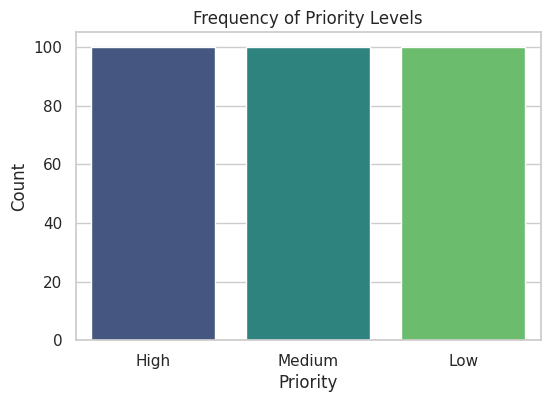

In [51]:
# ================================
# CELL 4: PRIORITY COUNTS VISUALIZATION
# ================================

plt.figure(figsize=(6,4))
sns.countplot(x=df["priority"], palette="viridis")
plt.title("Frequency of Priority Levels")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.show()


In [53]:
# ================================
# CELL 8: TRAIN-TEST SPLIT
# ================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Size:", X_train.shape)
print("Testing Size:", X_test.shape)


Training Size: (240, 97)
Testing Size: (60, 97)


In [54]:
# ================================
# CELL 9: TRAIN SVC MODEL
# ================================

model = SVC(kernel="linear", probability=True)
model.fit(X_train, y_train)

print("Model Training Completed!")


Model Training Completed!


In [55]:
# ================================
# CELL 10: MODEL EVALUATION
# ================================

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        20
         Low       1.00      1.00      1.00        20
      Medium       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



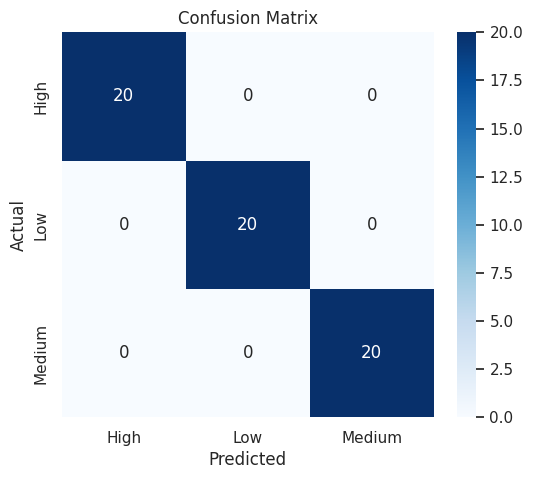

In [56]:
# ================================
# CELL 11: CONFUSION MATRIX
# ================================

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [57]:
# ================================
# CELL 12: PREDICTION FUNCTION
# ================================

def predict_priority(text):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned]).toarray()
    predicted_class = model.predict(vector)[0]
    return label_encoder.inverse_transform([predicted_class])[0]


In [58]:
# ================================
# CELL 13: TEST PREDICTION
# ================================

sample = "There is water leakage near electrical labs, dangerous for students."
print("Complaint:", sample)
print("Predicted Priority:", predict_priority(sample))


Complaint: There is water leakage near electrical labs, dangerous for students.
Predicted Priority: High
